# Making slice plots

### Import packages

In [1]:
import numpy                          as np
import matplotlib.pyplot              as plt

# import plons scripts
import plons.LoadSetup                as stp
import plons.LoadDump                 as dmp
import plons.SmoothingKernelScript    as sk
import plons.PhysicalQuantities       as pq
import plons.ConversionFactors_cgs    as cgs

### Setting information about data

In [2]:
prefix = "wind"
loc = "/STER/matse/Papers/Esseldeurs+2023/Phantom/High/binary6Lucy/"
outputloc = "."
phantom_dir = "/home/matse/codes/phantom/"
dump = loc+"wind_00600"

### Loading setup and dump

In [3]:
setup     = stp.LoadSetup(loc, prefix)

In [4]:
dumpData  = dmp.LoadDump_cgs(dump, setup, phantom_dir)

### Making plane on which to plot (as a meshgrid)

In [5]:
n = 200
x = np.linspace(-30*cgs.au, 30*cgs.au, n)
y = np.linspace(-30*cgs.au, 30*cgs.au, n)
X, Y = np.meshgrid(x, y)
Z    = np.zeros_like(X)

### Smoothing the data on the plane

In [6]:
smooth = sk.smoothMesh(X, Y, Z, dumpData, ['rho', 'Tgas', 'speed'])

### Plotting the plane

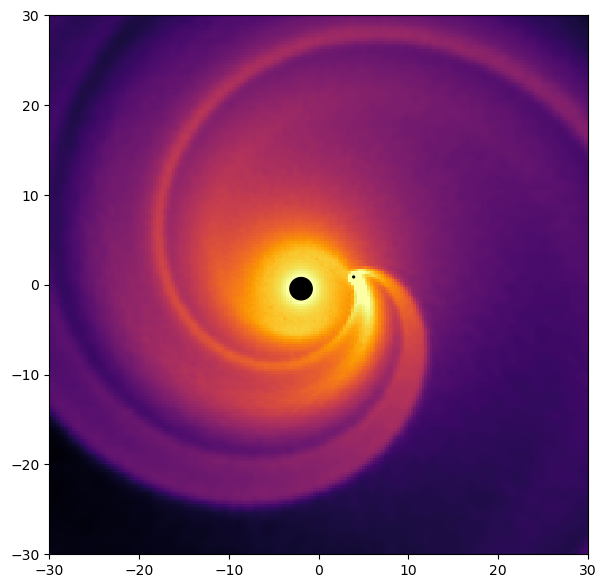

In [7]:
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.set_aspect('equal')
ax.set_facecolor('k')

ax.pcolormesh(X/cgs.au, Y/cgs.au, np.log10(smooth["rho"]+1e-99), cmap=plt.cm.get_cmap('inferno'), vmin=-17, vmax = -14)
ax.set_xlim(x[0]/cgs.au, x[-1]/cgs.au)
ax.set_ylim(y[0]/cgs.au, y[-1]/cgs.au)

circleAGB = plt.Circle(dumpData['posAGB']/cgs.au, setup["wind_inject_radius"], transform=ax.transData._b, color="black", zorder=10)
ax.add_artist(circleAGB)
circleComp = plt.Circle(dumpData['posComp']/cgs.au, setup["rAccrComp"], transform=ax.transData._b, color="black", zorder=10)
ax.add_artist(circleComp)

plt.show()

### Now smoothing the plane, but in a frame where the binary is located along the X-axis

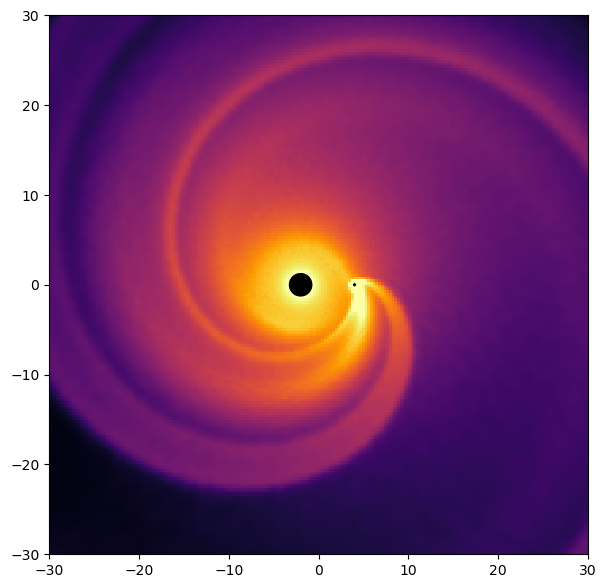

In [8]:
theta = pq.getPolarAngleCompanion(dumpData['posComp'][0], dumpData['posComp'][1])
X_rot, Y_rot, Z_rot = sk.rotateMeshAroundZ(theta, X, Y, Z)
smooth_rot = sk.smoothMesh(X_rot, Y_rot, Z_rot, dumpData, ['rho', 'Tgas', 'speed'])

fig, ax = plt.subplots(1, figsize=(7, 7))

ax.set_aspect('equal')
ax.set_facecolor('k')

ax.pcolormesh(X/cgs.au, Y/cgs.au, np.log10(smooth_rot["rho"]+1e-99), cmap=plt.cm.get_cmap('inferno'), vmin=-17, vmax = -14)
ax.set_xlim(x[0]/cgs.au, x[-1]/cgs.au)
ax.set_ylim(y[0]/cgs.au, y[-1]/cgs.au)

circleAGB = plt.Circle((-np.linalg.norm(dumpData['posAGB'])/cgs.au, 0.), setup["wind_inject_radius"], transform=ax.transData._b, color="black", zorder=10)
ax.add_artist(circleAGB)
circleComp = plt.Circle((np.linalg.norm(dumpData['posComp'])/cgs.au, 0.), setup["rAccrComp"], transform=ax.transData._b, color="black", zorder=10)
ax.add_artist(circleComp)

plt.show()

### Adding arrows on the plot

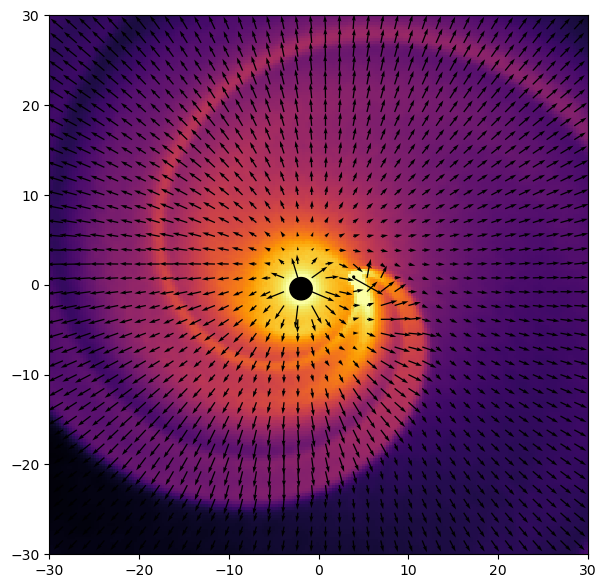

In [9]:
n_vec = 40
x_vec = np.linspace(-30*cgs.au, 30*cgs.au, n_vec)
y_vec = np.linspace(-30*cgs.au, 30*cgs.au, n_vec)
X_vec, Y_vec = np.meshgrid(x_vec, y_vec)
Z_vec    = np.zeros_like(X_vec)

smooth_vec = sk.smoothMesh(X_vec, Y_vec, Z_vec, dumpData, ['vx', 'vy', 'vz'])

normaliseVectorLength = 25.

fig, ax = plt.subplots(1, figsize=(7, 7))

ax.set_aspect('equal')
ax.set_facecolor('k')

ax.pcolormesh(X/cgs.au, Y/cgs.au, np.log10(smooth["rho"]+1e-99), cmap=plt.cm.get_cmap('inferno'), vmin=-17, vmax = -14)
ax.set_xlim(x[0]/cgs.au, x[-1]/cgs.au)
ax.set_ylim(y[0]/cgs.au, y[-1]/cgs.au)

circleAGB = plt.Circle(dumpData['posAGB']/cgs.au, setup["wind_inject_radius"], transform=ax.transData._b, color="black", zorder=10)
ax.add_artist(circleAGB)
circleComp = plt.Circle(dumpData['posComp']/cgs.au, setup["rAccrComp"], transform=ax.transData._b, color="black", zorder=10)
ax.add_artist(circleComp)

ax.quiver(X_vec / cgs.au, Y_vec / cgs.au,
            smooth_vec['vx'] / normaliseVectorLength, smooth_vec['vy'] / normaliseVectorLength, scale_units="dots", scale=0.05)

plt.show()

### Adding arrows in the rotating frame

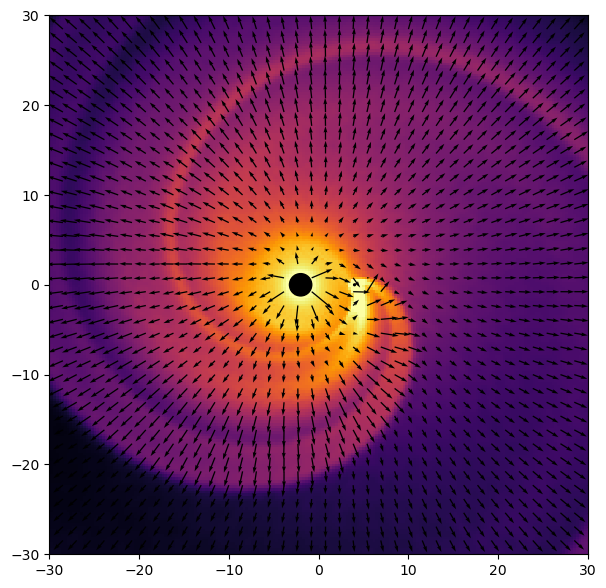

In [10]:
n_vec = 40
x_vec = np.linspace(-30*cgs.au, 30*cgs.au, n_vec)
y_vec = np.linspace(-30*cgs.au, 30*cgs.au, n_vec)
X_vec, Y_vec = np.meshgrid(x_vec, y_vec)
Z_vec    = np.zeros_like(X_vec)

theta = pq.getPolarAngleCompanion(dumpData['posComp'][0], dumpData['posComp'][1])
X_vec_rot, Y_vec_rot, Z_vec_rot = sk.rotateMeshAroundZ(theta, X_vec, Y_vec, Z_vec)
smooth_vec_rot = sk.smoothMesh(X_vec_rot, Y_vec_rot, Z_vec_rot, dumpData, ['vx', 'vy', 'vz'])
smooth_vec_rot = sk.rotateVelocityAroundZ(-theta, smooth_vec_rot)

normaliseVectorLength = 25.

fig, ax = plt.subplots(1, figsize=(7, 7))

ax.set_aspect('equal')
ax.set_facecolor('k')

ax.pcolormesh(X/cgs.au, Y/cgs.au, np.log10(smooth_rot["rho"]+1e-99), cmap=plt.cm.get_cmap('inferno'), vmin=-17, vmax = -14)
ax.set_xlim(x[0]/cgs.au, x[-1]/cgs.au)
ax.set_ylim(y[0]/cgs.au, y[-1]/cgs.au)

circleAGB = plt.Circle((-np.linalg.norm(dumpData['posAGB'])/cgs.au, 0.), setup["wind_inject_radius"], transform=ax.transData._b, color="black", zorder=10)
ax.add_artist(circleAGB)
circleComp = plt.Circle((np.linalg.norm(dumpData['posComp'])/cgs.au, 0.), setup["rAccrComp"], transform=ax.transData._b, color="black", zorder=10)
ax.add_artist(circleComp)

ax.quiver(X_vec / cgs.au, Y_vec / cgs.au,
            smooth_vec_rot['vx'] / normaliseVectorLength, smooth_vec_rot['vy'] / normaliseVectorLength, scale_units="dots", scale=0.05)

plt.show()

### Zooming in around the companion

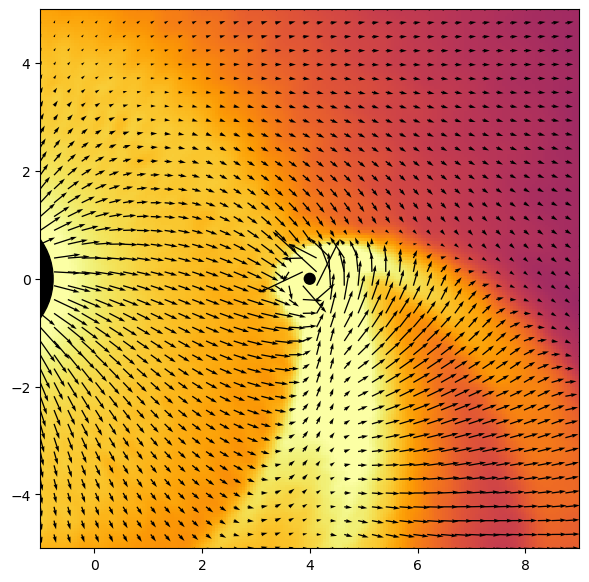

In [11]:
n = 200
x_comp = np.linspace(-5*cgs.au+np.linalg.norm(dumpData['posComp']), 5*cgs.au+np.linalg.norm(dumpData['posComp']), n)
y_comp = np.linspace(-5*cgs.au, 5*cgs.au, n)
X_comp, Y_comp = np.meshgrid(x_comp, y_comp)
Z_comp    = np.zeros_like(X_comp)

theta = pq.getPolarAngleCompanion(dumpData['posComp'][0], dumpData['posComp'][1])
X_rot_comp, Y_rot_comp, Z_rot_comp = sk.rotateMeshAroundZ(theta, X_comp, Y_comp, Z_comp)
smooth_rot_comp = sk.smoothMesh(X_rot_comp, Y_rot_comp, Z_rot_comp, dumpData, ['rho', 'Tgas', 'speed'])

n_vec = 40
x_vec_comp = np.linspace(-5*cgs.au+np.linalg.norm(dumpData['posComp']), 5*cgs.au+np.linalg.norm(dumpData['posComp']), n_vec)
y_vec_comp = np.linspace(-5*cgs.au, 5*cgs.au, n_vec)
X_vec_comp, Y_vec_comp = np.meshgrid(x_vec_comp, y_vec_comp)
Z_vec_comp    = np.zeros_like(X_vec_comp)

theta = pq.getPolarAngleCompanion(dumpData['posComp'][0], dumpData['posComp'][1])
X_vec_rot_comp, Y_vec_rot_comp, Z_vec_rot_comp = sk.rotateMeshAroundZ(theta, X_vec_comp, Y_vec_comp, Z_vec_comp)
smooth_vec_rot_comp = sk.smoothMesh(X_vec_rot_comp, Y_vec_rot_comp, Z_vec_rot_comp, dumpData, ['vx', 'vy', 'vz'])
smooth_vec_rot_comp = sk.rotateVelocityAroundZ(-theta, smooth_vec_rot_comp)

normaliseVectorLength = 25.

fig, ax = plt.subplots(1, figsize=(7, 7))

ax.set_aspect('equal')
ax.set_facecolor('k')

ax.pcolormesh(X_comp/cgs.au, Y_comp/cgs.au, np.log10(smooth_rot_comp["rho"]+1e-99), cmap=plt.cm.get_cmap('inferno'), vmin=-17, vmax = -14)
ax.set_xlim(x_comp[0]/cgs.au, x_comp[-1]/cgs.au)
ax.set_ylim(y_comp[0]/cgs.au, y_comp[-1]/cgs.au)

circleAGB = plt.Circle((-np.linalg.norm(dumpData['posAGB'])/cgs.au, 0.), setup["wind_inject_radius"], transform=ax.transData._b, color="black", zorder=10)
ax.add_artist(circleAGB)
circleComp = plt.Circle((np.linalg.norm(dumpData['posComp'])/cgs.au, 0.), setup["rAccrComp"], transform=ax.transData._b, color="black", zorder=10)
ax.add_artist(circleComp)

ax.quiver(X_vec_comp / cgs.au, Y_vec_comp / cgs.au,
            smooth_vec_rot_comp['vx'] / normaliseVectorLength, smooth_vec_rot_comp['vy'] / normaliseVectorLength, scale_units="dots", scale=0.05)

plt.show()